In [80]:
import pandas as pd

df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
columns = [
    'ram',
    'storage',
    'screen',
    'final_price'
]
df = df[columns]

<Axes: xlabel='final_price', ylabel='Count'>

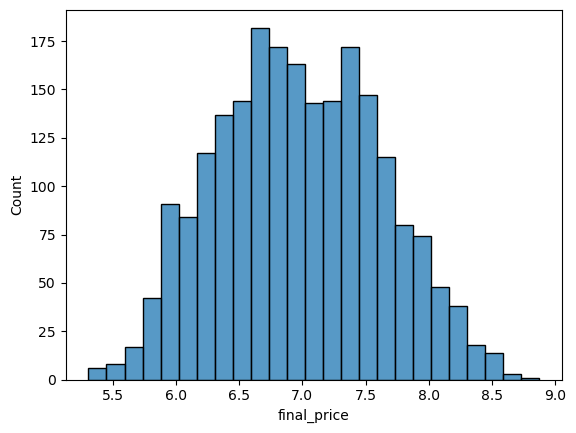

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(np.log1p(df.final_price))


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [83]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [84]:
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_test + n_val)

In [85]:
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']


In [86]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [87]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

In [88]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

597.36

In [89]:
def prepare_X_with_mean(df):
    df_num = df.copy()
    df_num.screen = df.screen.fillna(df.screen.mean())
    X = df_num.values
    return X

X_train = prepare_X_with_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
X_val = prepare_X_with_mean(df_val)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

600.26

In [90]:
def train_linear_regression_with_regularization(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [91]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_with_regularization(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print('%6s' %r, round(score, 2))

     0 600.26
  0.01 600.25
   0.1 600.19
     1 599.67
     5 598.54
    10 598.07
   100 597.61


In [92]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    scores.append(score)

    print(seed, round(score, 2))

print(round(np.std(scores), 3))


0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1
29.176


In [93]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

X_train = prepare_X(pd.concat([df_train, df_val]))
w_0, w = train_linear_regression_with_regularization(X_train, np.concatenate((y_train, y_val)), r=0.001)

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049533